## Single Cell Sequencing Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

/Users/maxzeidler/miniconda3/envs/neuroscience_beginner/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import the data loading
data = pd.read_csv("../Data/SingleCellRNA/singleCellBrain.csv")

In [4]:
# select the right index
# here unnamed: 0 represents the genes 
# look exactly at the genes
data_indeced = data.set_index("Unnamed: 0")
print(data_indeced.shape)
data_indeced.head()

(20190, 976)


,AAAAAAGTAAAG,AAAAAATTAACC,AAAAGTTGATGA,AAAATGTTGCTG,AAAATTGCAAAG,AAACACACTTCC,AAACAGTGGTAT,AAACCAGGCTCG,AAACGAACAGAA,AAACTGGTCCCC,...,TTTATTACAGGA,TTTCAAAAAGCA,TTTCACCAGAAG,TTTCCCGCAGAT,TTTCCCTTTGAC,TTTCTTAAAGCG,TTTTAAATGCGA,TTTTCTTCTAGG,TTTTTAGATTCC,TTTTTTGCAGTG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
00R_AC107638.2_ENSMUSG00000111425.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009O20Rik_ENSMUSG00000024442.5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1110020A21Rik_ENSMUSG00000097047.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700007L15Rik_ENSMUSG00000097318.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700024J04Rik_ENSMUSG00000069890.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# how can we get ride of this particular flaw?
data_indeced.index = ["_".join(i.split("_")[:-1]) for i in list(data_indeced.index)]
data_indeced.head()

,AAAAAAGTAAAG,AAAAAATTAACC,AAAAGTTGATGA,AAAATGTTGCTG,AAAATTGCAAAG,AAACACACTTCC,AAACAGTGGTAT,AAACCAGGCTCG,AAACGAACAGAA,AAACTGGTCCCC,...,TTTATTACAGGA,TTTCAAAAAGCA,TTTCACCAGAAG,TTTCCCGCAGAT,TTTCCCTTTGAC,TTTCTTAAAGCG,TTTTAAATGCGA,TTTTCTTCTAGG,TTTTTAGATTCC,TTTTTTGCAGTG
00R_AC107638.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009O20Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1110020A21Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700007L15Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700024J04Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# here we might remove genes that are lowely expressed
# in a real world example you would try to retrieve variablegenes
# such as in the scanpy or seurat packeg
# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
data_indeced = data_indeced.loc[data_indeced.sum(1) >= 10]
data_indeced.shape

(11465, 976)

43946 0


<AxesSubplot: ylabel='Count'>

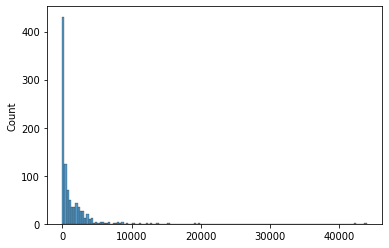

In [7]:
# get the sum of the data and an overview about the distribution
# usually scRNA sequencing and RNA sequencings are not normally distributed!
data_summed = data_indeced.sum().values
print(np.max(data_summed), np.min(data_summed))
sns.histplot(data = data_summed)
# Excersise: try to remove cells that are above a certain treshold write a function for this

<AxesSubplot: ylabel='Count'>

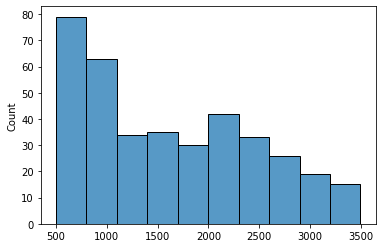

In [8]:
# Filtering Process, can you think about more filtering approaches
def drop_column(data, count_threshold):
    """ Remove the columns that are above or below a certain threshold
    data (pd.DataFrame) <- holds the scRNA with genes as index and cells as columns
    count_threshold (int) <- number of counts that should be used for slicing
    """
    remove_counts = data.copy()
    for column in remove_counts.columns:
        if (data[column].sum() > count_threshold) or (data[column].sum() < 500) :
            remove_counts = remove_counts.drop(column, axis = 1)

    return remove_counts

data_removed = drop_column(data_indeced,3500)
sns.histplot(data_removed.sum(), palette="Pastel") # draw the histogram

,AAAAAATTAACC,AAACCAGGCTCG,AAACGAACAGAA,AAACTGGTCCCC,AAAGACCAGTAT,AACACAACAACC,AACACTCAGGTT,AACATACTGCTG,AACCACGTGGAT,AACCAGGTTCTG,...,TTCGCTTGGAGA,TTCTATAACAAC,TTCTCGTCTAAA,TTCTTAACATAT,TTGCCTGATTTC,TTGGCCCACCCA,TTGGTGTACTAA,TTGTATCATGTT,TTTCACCAGAAG,TTTCCCGCAGAT
0610009O20Rik,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,2.611999,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1700086O06Rik,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1810055G02Rik,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.899873,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2310039H08Rik,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2410015M20Rik,0.0,0.0,2.012912,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.645934,0.0,2.340812,0.0,1.973496,1.845827


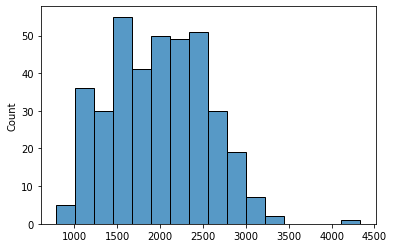

In [9]:
# here we normalize the data accordingly
# check the histogram, what happened to our data
data_log = data_removed.apply(lambda x: np.log(((x/sum(x))*10000)+1))
sns.histplot((data_log.sum()))
data_log.head()

In [51]:
# Perform PCA Analysis
# create the PCA object
pca = PCA(n_components=30)

# this one is scaled for the heatmap and not used for PCA
# It is scaled along the row axis instead of the feature axis ot scale the whole
# dataset
scaled_data_visualization = pd.DataFrame(StandardScaler().fit_transform(data_log.T), 
                           index = data_log.columns,
                           columns = data_log.index).T

pca_transformed = pca.fit_transform(data_log.T)
pca_transformed = pd.DataFrame(pca_transformed, index = data_log.T.index)
pca_transformed

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
AAAAAATTAACC,-13.291253,16.214881,2.966187,-8.783422,-10.543777,3.202425,0.209408,-1.543423,4.067367,-1.345813,...,4.987984,2.197805,1.168288,8.688744,-3.584444,1.524821,3.231879,-0.868343,-2.781210,8.372784
AAACCAGGCTCG,-8.172047,-6.418612,-13.139237,-10.622197,8.742639,-10.181032,-4.291599,-1.991316,-2.167540,-0.730868,...,-4.288722,1.701325,-4.637369,0.142046,-3.036589,-0.511011,1.906894,3.531478,-3.820968,-2.120215
AAACGAACAGAA,20.178095,1.709154,-3.233095,0.990611,-2.614885,0.387058,0.165789,0.106057,-2.142123,3.933896,...,0.386905,2.497583,-3.963970,0.425840,-4.993118,-0.175195,1.403640,-1.127798,-2.541490,5.268392
AAACTGGTCCCC,-13.815117,13.052948,-11.636256,18.213952,13.616246,2.573618,-5.210242,1.426433,2.193074,0.598837,...,-2.415451,1.447310,0.237190,0.083413,-1.516774,4.192968,-3.214997,-0.027655,0.625592,3.057002
AAAGACCAGTAT,-7.338010,-8.075392,-15.601483,-14.275015,1.956138,-7.009818,1.564803,-3.815432,-1.160163,4.114081,...,0.995856,-1.772957,-3.488546,-2.148097,-0.747431,6.096514,-3.902460,3.320761,1.743844,2.496618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGCCCACCCA,-10.758906,6.883641,-5.816977,-4.364622,-9.462248,0.169794,16.413104,6.447505,0.805471,-1.282258,...,3.234850,-3.388719,3.196678,1.343392,-9.674907,1.720747,-3.691798,3.917420,3.393168,-1.240113
TTGGTGTACTAA,-6.583948,-8.657524,-11.347922,-15.900203,6.568546,-9.702893,-1.715746,-2.527828,0.651877,0.770283,...,-1.615863,-3.662580,-5.465721,-2.571663,-2.643381,-1.811575,2.590436,0.848005,1.682760,-1.432627
TTGTATCATGTT,-13.315937,21.020131,5.769581,-8.098410,-10.733773,2.217889,-5.323747,-2.839384,2.000387,-1.274915,...,-3.075140,1.929098,-1.178013,-4.698564,-0.893145,-1.924161,-1.770441,-0.011696,-2.271913,-0.696544
TTTCACCAGAAG,21.039745,2.876625,-2.214776,0.352755,-2.598847,1.536590,1.971099,-2.077184,1.033146,0.382603,...,-2.061733,-0.312327,-0.474630,3.011460,-3.033597,-4.074227,3.064414,1.670610,-0.635894,-0.019657


Text(0, 0.5, 'Explained Variance')

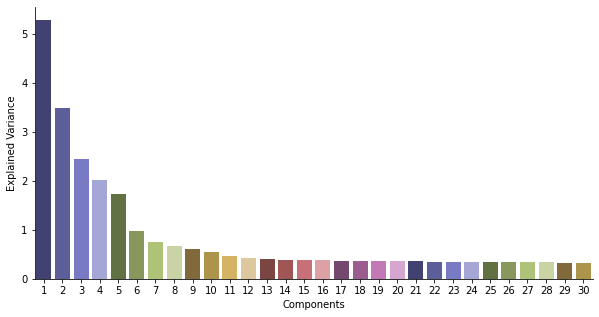

In [52]:
# visualize the components and decide for a number of components
# retrieve the explained variance
x = pca.explained_variance_ratio_ * 100
number_components = list(range(1,31))
# Get the number of components
fig,ax = plt.subplots(figsize = (10,5))
sns.despine()
sns.barplot(x = number_components, y = x, palette = "tab20b")
plt.xlabel("Components")
plt.ylabel("Explained Variance")

In [54]:
# select this for further processing
pca_transformed_selected = pca_transformed.iloc[:,:11]
pca_transformed_selected.shape

(376, 11)

In [56]:
# this we can later us also for further analysis 
first_two_components_df = pd.DataFrame(pca_transformed_selected.iloc[:,:2], columns = ["PC1", "PC2"])

                  PC 9     PC 10
AAAAAATTAACC -1.345813 -0.122742
AAACCAGGCTCG -0.730868  0.876252
AAACGAACAGAA  3.933896 -1.278556
AAACTGGTCCCC  0.598837  4.158909
AAAGACCAGTAT  4.114081  4.096156
...                ...       ...
TTGGCCCACCCA -1.282258  7.770370
TTGGTGTACTAA  0.770283  1.331891
TTGTATCATGTT -1.274915 -2.109456
TTTCACCAGAAG  0.382603 -2.088954
TTTCCCGCAGAT -3.862737 -0.211386

[376 rows x 2 columns]


,PC 9,PC 10
AAAAAATTAACC,-1.345813,-0.122742
AAACCAGGCTCG,-0.730868,0.876252
AAACGAACAGAA,3.933896,-1.278556
AAACTGGTCCCC,0.598837,4.158909
AAAGACCAGTAT,4.114081,4.096156
...,...,...
TTGGCCCACCCA,-1.282258,7.770370
TTGGTGTACTAA,0.770283,1.331891
TTGTATCATGTT,-1.274915,-2.109456
TTTCACCAGAAG,0.382603,-2.088954


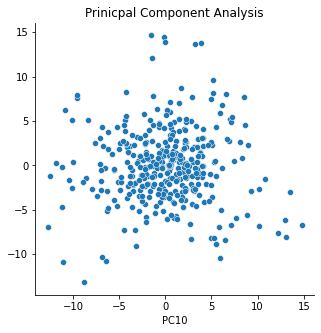

In [57]:
# Here we check the correlation analysis between the components 
# We also retrieve the different component plots
def visualize_components(components, genes,  component1):
    
    """ Here we visualize the Principal Components
    args:
     components <- Calculated PCAs
     genes <- log normalized gene matrix
     component1 <- First component to choose will be increment since it makes only sense
     to use the second compenent
     
     returns:
        list: top correlated genes to the component and the transposed gene matrix
    """
    component_1 = components[:,component1] # select component 1
    component_2 = components[:,component1 + 1] # select component 2
    
    # create a new dataframe merging the components and the gene expression
    genes_transposed = genes.T
    genes_transposed[f"PC {component1}"] = component_1.tolist()
    genes_transposed[f"PC {component1+1}"] = component_2.tolist()
    correlation = pd.DataFrame(np.corrcoef(genes_transposed.T.values), 
                               columns = genes_transposed.columns,
                               index = genes_transposed.columns).iloc[:-2, -2:]
    
    component_1_correlation = correlation.sort_values(f"PC {component1}").iloc[:30,0].index.tolist() 
    component_2_correlation = correlation.sort_values(f"PC {component1+1}").iloc[:30,1].index.tolist()  
    #correlation = genes.corrwith(pd.Series(component_1), axis = 1)
    
    
    fig, ax = plt.subplots(figsize = (5,5))
    sns.despine()
    sns.scatterplot(x = component_1, y = component_2)
    plt.xlabel(f"PC{component1}")
    plt.xlabel(f"PC{component1 + 1}")
    plt.title("Prinicpal Component Analysis")
    
    print(genes_transposed.iloc[:,-2:])
    return [(component_1_correlation, component_2_correlation), genes_transposed.iloc[:,-2:]]

pca_analysis = visualize_components(pca_transformed_selected.values, data_log, 9)
pca_analysis[1]

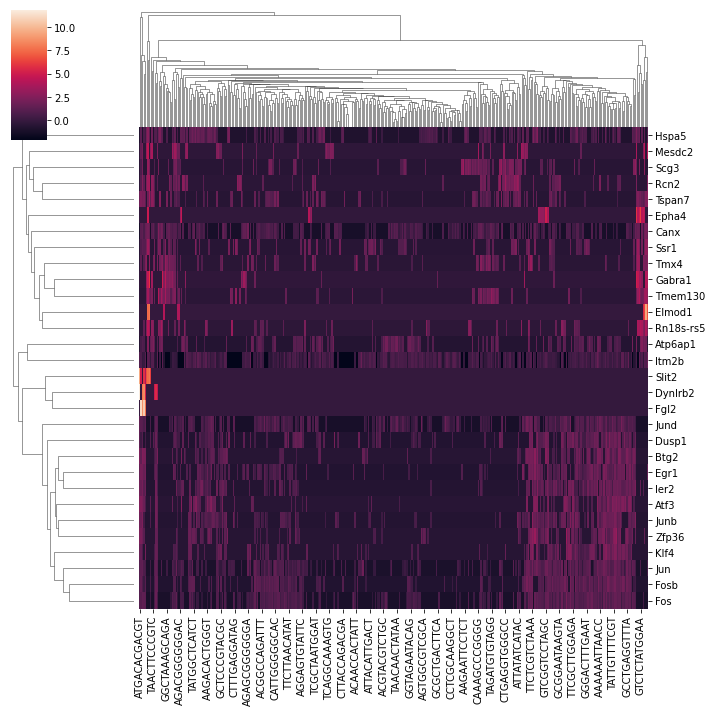

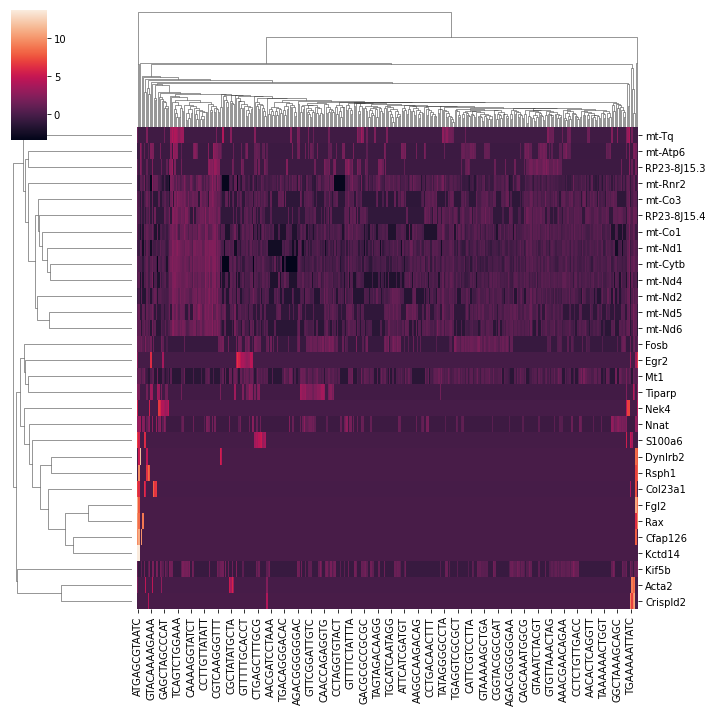

In [58]:
def draw_heatmap_of_genes(genes, component_features):
    """Draw a clustered heatmap of the components"""
    for i in component_features:
        genes_selected = genes[genes.index.isin(i)]
        sns.clustermap(data = genes_selected, figsize = (10,10))
        
draw_heatmap_of_genes(scaled_data_visualization, pca_analysis[0])

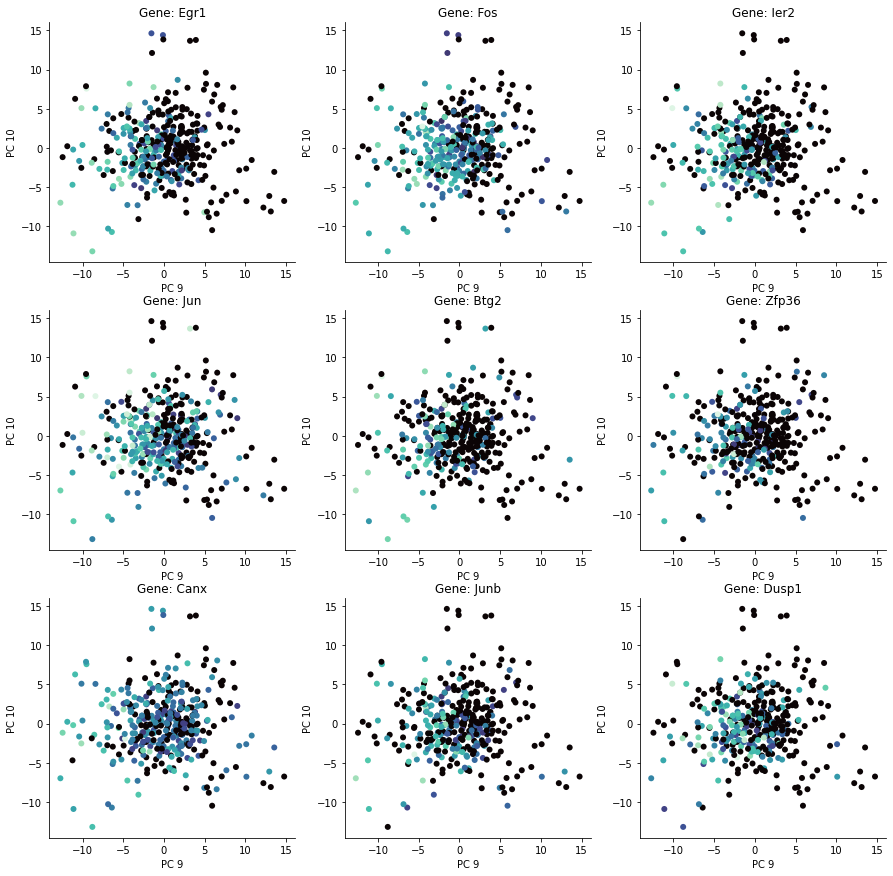

In [59]:
def draw_top5_feature_on_component(pca_components, expression, features):
    """ draw the top 5 genes expression pattern on the selected PCA
    args:
    pca_components type(pd.DataFrame) <- holds the PCA components
    expression type(pd.DataFrame) <- holds the original expression data log normalized
    features type(list) <- holds genes that are correlated/associated with PCA (you can use evey list with feature names)
    
    return:
        None
    """
    plt.figure(figsize=(15, 15))
    count = 0
    for i in features[0][:9]:
        pca_components["features"] = expression.T[i].tolist()
        ax = plt.subplot(3, 3, count + 1)
        sns.despine()
        sns.scatterplot(x = pca_components.columns[0],
                        y = pca_components.columns[1], 
                        hue = "features", 
                        data = pca_components,
                        ax = ax,
                        palette = "mako",
                       legend = False,
                       linewidth = 0)
        plt.title(f"Gene: {i}")
        count +=1
        

draw_top5_feature_on_component(pca_analysis[1],data_log, pca_analysis[0])
# use the original table
#first_two_components_df

,Umap1,Umap2
AAAAAATTAACC,14.690832,11.229676
AAACCAGGCTCG,4.986869,-9.235494
AAACGAACAGAA,1.379846,13.566116
AAACTGGTCCCC,17.963820,3.688398
AAAGACCAGTAT,11.314324,9.780063
...,...,...
TTGGCCCACCCA,-7.043478,-4.976415
TTGGTGTACTAA,4.901112,-9.154052
TTGTATCATGTT,1.875336,-10.998866
TTTCACCAGAAG,16.278963,14.902670


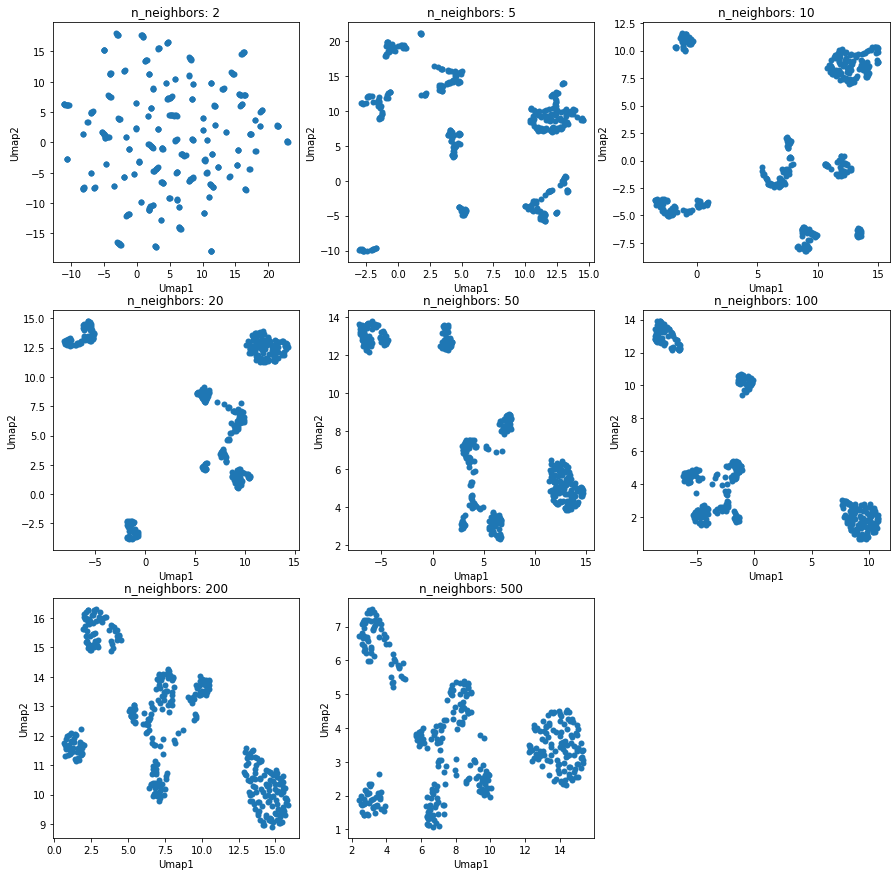

In [60]:
# now lets use the selected components and draw a umap
#https://umap-learn.readthedocs.io/en/latest/
from umap.umap_ import UMAP

def umap(pca_components, number_components = None):
    """ Draw an Umap using the PCA components of the DATA
    pca_components <- numpy Array holding all the components
    number_components <- How many components of the PCA will be selected"""
    
    # Create a Figure Object
    fig = plt.figure(figsize=(15, 15))
    count = 0 # iterator for plotting procedures
    umap_list = [] # save the dataframes for each n_neighbor parameter
    for i in [2,5,10,20,50,100,200, 500]:
        reducer = UMAP(n_neighbors=i, min_dist = 0.25)
        
        #check if we preselect number of components
        if number_components:
            pca_components = pca_components.iloc[:,:number_components]

            data_umap = reducer.fit_transform(pca_components)
        else:
            data_umap = reducer.fit_transform(pca_components)

        # create a df 
        data_umap = pd.DataFrame(data_umap, columns = ["Umap1","Umap2"], index = pca_components.index)

        # draw the scatterplot
        ax = plt.subplot(3, 3, count + 1)
        sns.scatterplot(x = "Umap1",
                        y = "Umap2", 
                        data = data_umap, 
                        ax = ax,
                        legend = False,
                        linewidth = 0
                       )
        
        # increase iterator to plot the next plot on the axis
        ax.set_title(f"n_neighbors: {i}")
        count+= 1
        umap_list.append(data_umap)
    return umap_list # returns the umap map with the dataframe you can select the best one to perform clustering/community detection

scRNA_umap = umap(pca_transformed, number_components = 14)
scRNA_umap[0].shape
scRNA_umap[0]

In [74]:
# what would be the next steps in the Pipelines?
# what types of clustering are available
# now let us try some clustering
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(scRNA_umap[6])
scRNA_umap[6]["beginner_cluster"] = y_km
data_test = data_log.T
data_test["cluster"] = y_km

<AxesSubplot: xlabel='Umap1', ylabel='Umap2'>

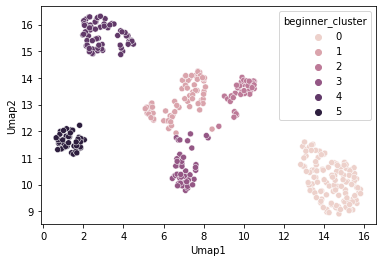

In [69]:
# data visualization
sns.scatterplot(data = scRNA_umap[6],x = "Umap1", y = "Umap2",hue = "beginner_cluster")

In [110]:
# now let us retrieve the significant genes
# we use a simple wilcoxon rank test on the normalized data
# more complex model with can ofc be used
# this should be an exercise for the students
from scipy.stats import mannwhitneyu

def wilcoxon_test_cells(cluster1, cluster2, data_log)-> pd.DataFrame:
    """_summary_

    Args:
        cluster1 (_type_): _description_
        cluster2 (_type_): _description_
        data_log (_type_): _description_
        scRNA_umap (_type_): _description_
    """
    cells_cluster_1 = data_log[data_log["cluster"] == cluster1].index.tolist()
    cells_cluster_2 = data_log[data_log["cluster"] == cluster2].index.tolist()
    data_log = data_log.iloc[:,:-1]
    expression_dictionary = {"gene": [], "p_value": []}
    for i in data_log.columns:
        cluster_1_value = data_log[data_log.index.isin(cells_cluster_1)][i].values
        cluster_2_value = data_log[data_log.index.isin(cells_cluster_2)][i].values
        try:
            statistic, pvalue = mannwhitneyu(x = cluster_1_value, y= cluster_2_value)
            expression_dictionary["p_value"].append(float(pvalue))
            expression_dictionary["gene"].append(i)
            
        except Exception as e:
            print(e)
      
    return expression_dictionary  

expression_dictionary = wilcoxon_test_cells(5,0, data_test)

only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars


In [114]:
trial = pd.DataFrame.from_dict(expression_dictionary)
trial = trial[trial["p_value"] < 0.0001]
trial

,gene,p_value
59,Abhd12,9.231195e-05
66,Abhd3,4.515056e-05
240,Acsl3,1.567361e-07
243,Acsl6,9.352252e-07
248,Actb,1.022871e-10
...,...,...
10884,Vsir,1.279452e-07
11089,Zbtb20,5.495270e-05
11164,Zeb2,3.089381e-05
11171,Zfand5,8.936410e-05
